In [1]:
import os
import csv

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [13]:
pd.__version__
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

In [3]:
AARM_DEVICES = ["jetson_cpu", "jetson_gpu", "rpi4_cpu",]  # pi3_cpu
x86_DEVICES= ["herron_cpu", "herron_gpu", "laptop_cpu"]

SEQ_LENGTHS = [2 ** seqlen for seqlen in range(10)]

BASELINE_MODELS = ["bert", "roberta"] # deberta, ibert
EFFICIENT_MODELS = ["distilbert", "mobile_bert", "squeeze_bert"]
OTHER_TRANSFORMER_MODELS = ['longformer']
VISION_MODEL = [] # TODO: Add vision model visuals

In [4]:
EXP_DIR = "experiments/0824_wallclock/"
DEVICE_LIST = AARM_DEVICES + x86_DEVICES

In [5]:
wallclock_results = pd.concat([
    pd.read_csv(os.path.join(EXP_DIR, f"{device}.csv"))
    for device in DEVICE_LIST
])

In [6]:
mac_results = pd.read_csv("experiments/0824_flops/laptop_cpu.csv")
# mac_results = mac_results.loc[mac_results['sequence_length'] == 512]

distilbert
mobile_bert
squeeze_bert
bert
distilbert
mobile_bert
squeeze_bert
bert


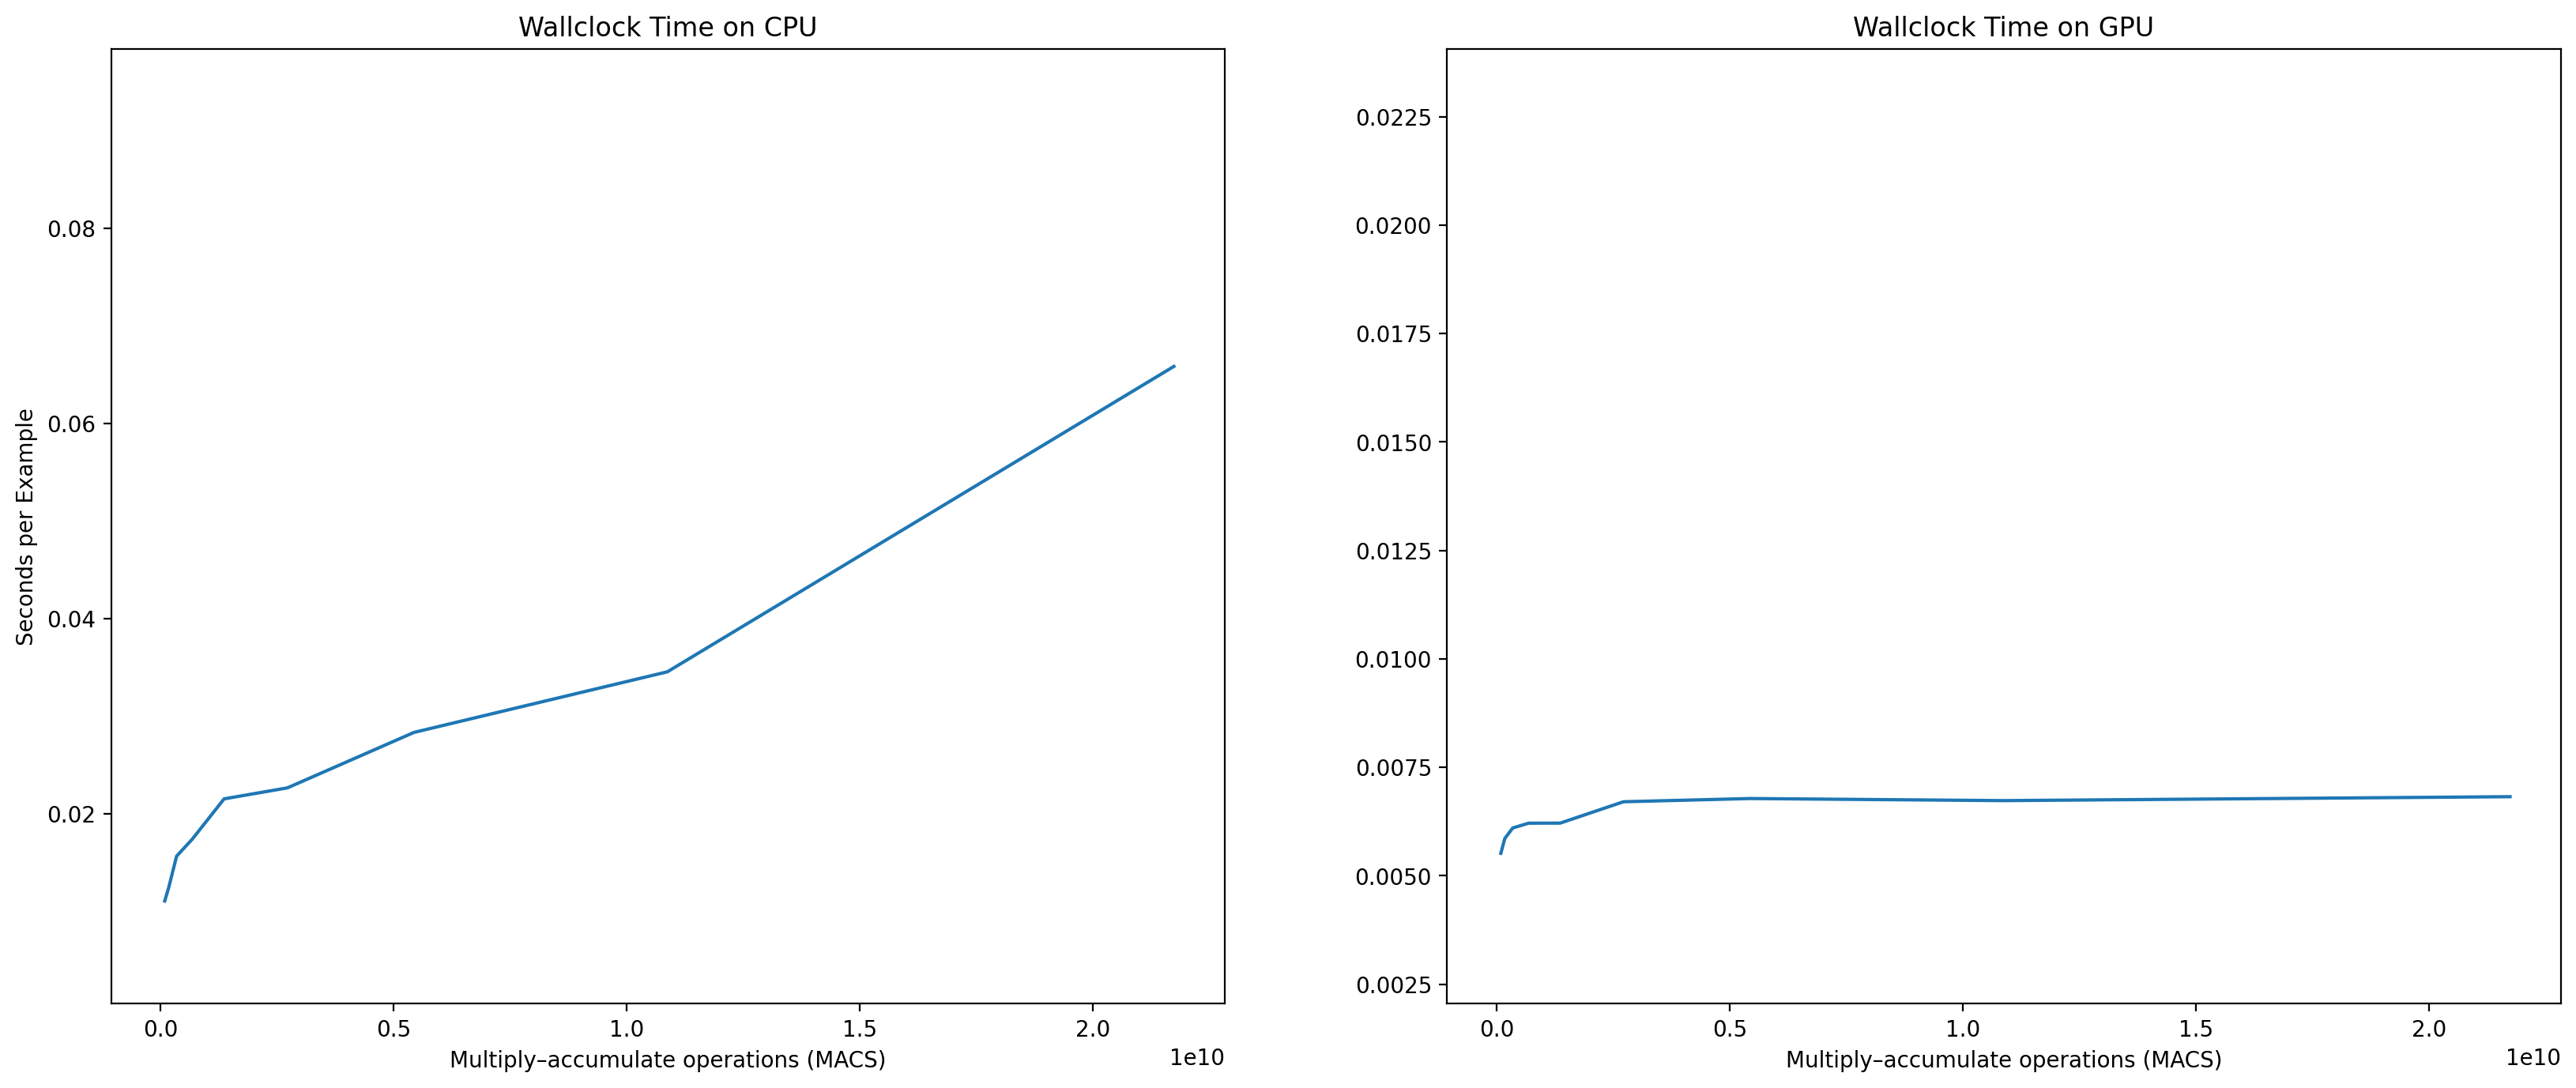

In [32]:
# results_df = wallclock_results.loc[all_results['device'] == 'herron_cpu']
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))

ax1.set_ylabel("Seconds per Example")
ax1.set_xlabel("Multiply–accumulate operations (MACS)")
ax2.set_xlabel("Multiply–accumulate operations (MACS)")

ax1.set_title("Wallclock Time on CPU")
ax2.set_title("Wallclock Time on GPU")

wallclock_time = []
macs = []
for subplot, device in [(ax1, 'herron_cpu'), (ax2, 'herron_gpu')]:
    results_df = wallclock_results.loc[wallclock_results['device'] == device]
    for model in  EFFICIENT_MODELS + ['bert']:
        print(model)
        mac_result = mac_results.loc[mac_results['model'] == model]['macs'].tolist(),
        wallclock_result = results_df.loc[results_df['model'] == model]['mean'].tolist(),

        if model =='bert':
            mac_result = mac_result[0][:-1]
            wallclock_result = wallclock_result[0][:-1]
        subplot.scatter(
            mac_result, wallclock_result, 
            label=f"{model}")
#         plt.annotate(f"{device}-{model}", (mac_results.loc[mac_results['model'] == model]['macs'].tolist()[-1],
#                                      results_df.loc[results_df['model'] == model]['mean'].tolist()[-1]))

#     if model
 
#     wallclock_time.extend(results_df.loc[results_df['model'] == model]['mean'].tolist())
#     macs.extend(mac_results.loc[mac_results['model'] == model]['macs'].tolist())
# plt.legend()
# plt.scatter(macs), len(wallclock_time)

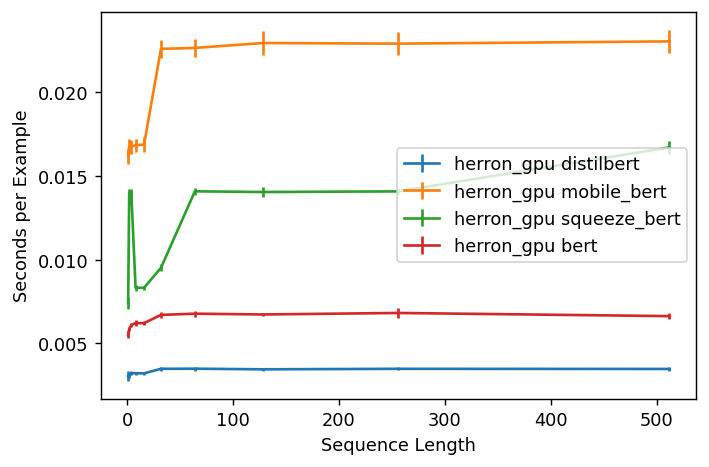

In [52]:
plt.ylabel("Seconds per Example")
plt.xlabel("Sequence Length")
# plt.xscale('log')

for device in ['herron_gpu']:
    results_df = wallclock_results.loc[all_results['device'] == device]
    for model in EFFICIENT_MODELS + ['bert']:
        model_entries =  results_df.loc[results_df['model'] == model].sort_values('sequence_length')
        seq_lens = model_entries['sequence_length']
        mean_time = model_entries['mean']

        fifthpct = mean_time - model_entries['5_pct']
        ninetyfifth_time = model_entries['95_pct'] - mean_time
        
        plt.errorbar(seq_lens, mean_time, yerr=np.array(fifthpct, ninetyfifth_time), label=f"{device} {model}")
        plt.legend()

In [47]:
mean_time =['mean']

In [238]:
wallclocks = pd.read_csv("log/wallclock.csv")
wallclocks.set_index(["Model", "Device"], inplace=True)

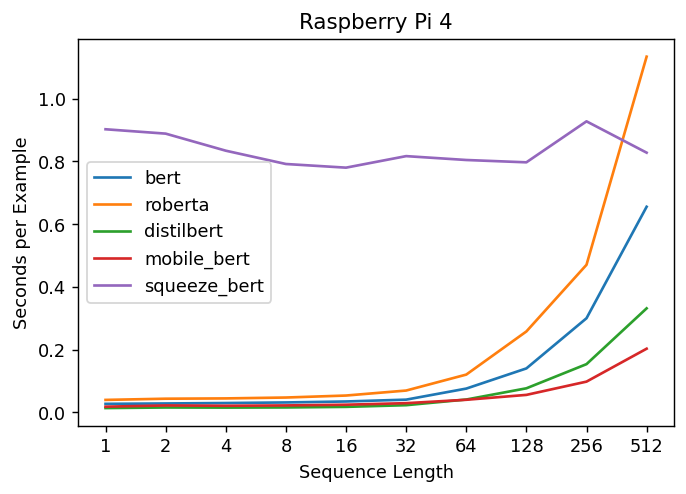

In [260]:
for model in BASELINE_MODELS + EFFICIENT_MODELS:
#     print(model)
    plt.plot(wallclocks.loc[model, "laptop"], label=model)

# plt.yscale('log')
plt.title("Raspberry Pi 4")
plt.ylabel("Seconds per Example")
plt.xlabel("Sequence Length")
plt.legend()

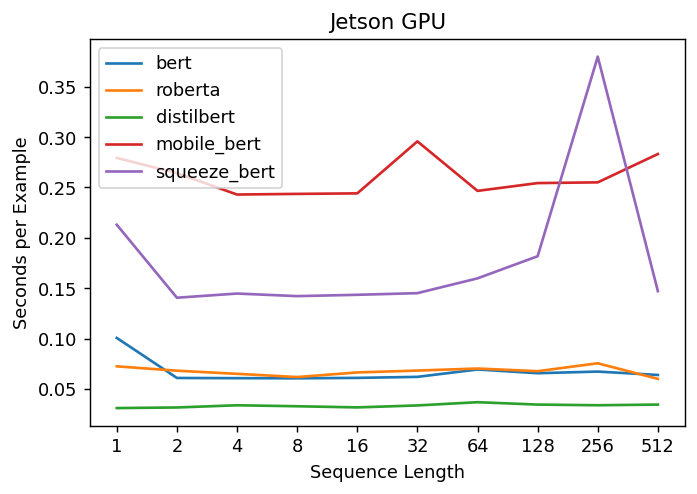

In [259]:
for model in BASELINE_MODELS + EFFICIENT_MODELS:
#     print(model)
    plt.plot(wallclocks.loc[model, "jetson_gpu"], label=model)

# plt.yscale('log')
plt.title("Jetson GPU")
plt.ylabel("Seconds per Example")
plt.xlabel("Sequence Length")
plt.legend(loc='upper left')